***BIG DATA RESEARCH PROJECT: INVESTIGATING DONATION BIAS ON PHYSICIAN DRUG PRESCRIPTIONS***

---




***STEP 1: PARSING/CLEANING THE DATA ***

1.   [Accepted donations made to doctors from 2013 to 2017 ](https://openpaymentsdata.cms.gov/browse) 
2.   [Prescriptions made by Medicare physicians](https://data.cms.gov/Medicare-Part-D/Medicare-Provider-Utilization-and-Payment-Data-201/3z4d-vmhm)
**NOTE: try to find more calendar years** [Link to more years of data](https://www.cms.gov/Research-Statistics-Data-and-Systems/Statistics-Trends-and-Reports/Medicare-Provider-Charge-Data/Part-D-Prescriber.html)
3. [List of drugs, their producer, and their prices](https://www.cms.gov/Research-Statistics-Data-and-Systems/Statistics-Trends-and-Reports/Information-on-Prescription-Drugs/Downloads/Medicare_PartD_Drug_Spending_Data.zip)


In [3]:
# import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly
import dask.dataframe as dd

## Open Payments Dataset

### Reading in Files

In [5]:
# read in the open payments file
file = "/Volumes/Samsung_T5/Misc/out_open_payments.csv"

open_payments = dd.read_csv(file,
                            dtype={'Associated_Drug_or_Biological_NDC_4': 'object',
       'Covered_or_Noncovered_Indicator_4': 'object',
       'Covered_or_Noncovered_Indicator_5': 'object',
       'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_4': 'object',
       'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_5': 'object',
       'Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_4': 'object',
       'Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_5': 'object',
       'Product_Category_or_Therapeutic_Area_4': 'object',
       'Product_Category_or_Therapeutic_Area_5': 'object',
       'Recipient_Postal_Code': 'object',
       'Recipient_Province': 'object'},
                           low_memory=False)

### File Description
The Open Payments file contains information about Doctors, their names, specialty, city and state of work. It also contains the amount of money the doctors received from companies, which companies pay them, the drug/device for which they were paid, etc.
There are a total of 10.9 million rows and 75 columns in the dataset.

#### Dask DataFrame
To adequately load in our files, we used Dask. Dask is a python library for reading in datasets that are too large for pandas to handle. Dask is mostly used in distributed computing, but it came in handy for our usage.
It lazily reads in the file, and divides the data in several hundred chunks.
Whenever needed, Dask parallelizes computations, and hence provides substantive speed up over using pandas.

In [6]:
open_payments.head(10)

,Physician_Profile_ID,Name,Teaching_Hospital_CCN,Teaching_Hospital_ID,Teaching_Hospital_Name,Recipient_City,Recipient_State,Recipient_Zip_Code,Recipient_Country,Recipient_Province,...,Associated_Drug_or_Biological_NDC_3,Covered_or_Noncovered_Indicator_4,Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_4,Product_Category_or_Therapeutic_Area_4,Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_4,Associated_Drug_or_Biological_NDC_4,Covered_or_Noncovered_Indicator_5,Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_5,Product_Category_or_Therapeutic_Area_5,Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_5
0,1261770.0,Donald Delisi,NaN,NaN,NaN,Bend,OR,97702,United States,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,436996.0,Todd Schock,NaN,NaN,NaN,Bend,OR,97702,United States,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,640211.0,Keith Krueger,NaN,NaN,NaN,Bend,OR,97702,United States,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,389063.0,Arthur Pancioli,NaN,NaN,NaN,Cincinnati,OH,45243,United States,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,389063.0,Arthur Pancioli,NaN,NaN,NaN,Cincinnati,OH,45243,United States,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,389063.0,Arthur Pancioli,NaN,NaN,NaN,Cincinnati,OH,45243,United States,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,74635.0,JOHN FORDTRAN,NaN,NaN,NaN,DALLAS,TX,75246-2017,United States,NaN,...,10572-302-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,74635.0,JOHN FORDTRAN,NaN,NaN,NaN,DALLAS,TX,75246-2017,United States,NaN,...,10572-302-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,74635.0,JOHN FORDTRAN,NaN,NaN,NaN,DALLAS,TX,75246-2017,United States,NaN,...,10572-302-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,74635.0,JOHN FORDTRAN,NaN,NaN,NaN,DALLAS,TX,75246-2017,United States,NaN,...,10572-302-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
open_payments.columns

Index(['Physician_Profile_ID', 'Name', 'Teaching_Hospital_CCN',
       'Teaching_Hospital_ID', 'Teaching_Hospital_Name', 'Recipient_City',
       'Recipient_State', 'Recipient_Zip_Code', 'Recipient_Country',
       'Recipient_Province', 'Recipient_Postal_Code', 'Physician_Primary_Type',
       'Physician_Specialty',
       'Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name',
       'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID',
       'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name',
       'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State',
       'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Country',
       'Total_Amount_of_Payment_USDollars', 'Date_of_Payment',
       'Number_of_Payments_Included_in_Total_Amount',
       'Form_of_Payment_or_Transfer_of_Value',
       'Nature_of_Payment_or_Transfer_of_Value',
       'Physician_Ownership_Indicator',
       'Third_Party_Payment_Recipient_Indicator',
       'Name_of_Third

#### Unwanted columns
After going through the columns, we found some that wasn't useful for out needs. Hence, we removed those columns from the datasets.

In [9]:
to_remove = ['Covered_or_Noncovered_Indicator_2',
       'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_2',
       'Product_Category_or_Therapeutic_Area_2',
       'Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_2',
       'Associated_Drug_or_Biological_NDC_2',
       'Covered_or_Noncovered_Indicator_3',
       'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_3',
       'Product_Category_or_Therapeutic_Area_3',
       'Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_3',
       'Associated_Drug_or_Biological_NDC_3',
       'Covered_or_Noncovered_Indicator_4',
       'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_4',
       'Product_Category_or_Therapeutic_Area_4',
       'Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_4',
       'Associated_Drug_or_Biological_NDC_4',
       'Covered_or_Noncovered_Indicator_5',
       'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_5',
       'Product_Category_or_Therapeutic_Area_5',
       'Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_5', 
        'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_2',
       'Product_Category_or_Therapeutic_Area_2',
       'Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_2',
       'Associated_Drug_or_Biological_NDC_2',
       'Covered_or_Noncovered_Indicator_3',
       'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_3',
       'Product_Category_or_Therapeutic_Area_3',
       'Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_3',
       'Associated_Drug_or_Biological_NDC_3',
       'Covered_or_Noncovered_Indicator_4',
       'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_4',
       'Product_Category_or_Therapeutic_Area_4',
       'Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_4',
       'Associated_Drug_or_Biological_NDC_4',
       'Covered_or_Noncovered_Indicator_5',
       'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_5',
       'Product_Category_or_Therapeutic_Area_5',
       'Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_5']

df = open_payments.drop(to_remove, axis =1 )

In [10]:
df.columns

Index(['Physician_Profile_ID', 'Name', 'Teaching_Hospital_CCN',
       'Teaching_Hospital_ID', 'Teaching_Hospital_Name', 'Recipient_City',
       'Recipient_State', 'Recipient_Zip_Code', 'Recipient_Country',
       'Recipient_Province', 'Recipient_Postal_Code', 'Physician_Primary_Type',
       'Physician_Specialty',
       'Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name',
       'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID',
       'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name',
       'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State',
       'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Country',
       'Total_Amount_of_Payment_USDollars', 'Date_of_Payment',
       'Number_of_Payments_Included_in_Total_Amount',
       'Form_of_Payment_or_Transfer_of_Value',
       'Nature_of_Payment_or_Transfer_of_Value',
       'Physician_Ownership_Indicator',
       'Third_Party_Payment_Recipient_Indicator',
       'Name_of_Third

In [11]:
r = ['Physician_Ownership_Indicator',
       'Third_Party_Payment_Recipient_Indicator',
       'Name_of_Third_Party_Entity_Receiving_Payment_or_Transfer_of_Value',
       'Charity_Indicator', 'Contextual_Information',
       'Dispute_Status_for_Publication', 'Covered_or_Noncovered_Indicator_1']
df = df.drop(r, axis=1)

In [12]:
df.columns

Index(['Physician_Profile_ID', 'Name', 'Teaching_Hospital_CCN',
       'Teaching_Hospital_ID', 'Teaching_Hospital_Name', 'Recipient_City',
       'Recipient_State', 'Recipient_Zip_Code', 'Recipient_Country',
       'Recipient_Province', 'Recipient_Postal_Code', 'Physician_Primary_Type',
       'Physician_Specialty',
       'Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name',
       'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID',
       'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name',
       'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State',
       'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Country',
       'Total_Amount_of_Payment_USDollars', 'Date_of_Payment',
       'Number_of_Payments_Included_in_Total_Amount',
       'Form_of_Payment_or_Transfer_of_Value',
       'Nature_of_Payment_or_Transfer_of_Value',
       'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_1',
       'Product_Category_or_Therapeutic_Are

In [13]:
## Convert dask dataframe to pandas dataframe

payments = open_payments.compute()

### Data Processing

We decided to only look at the top 20 Big Pharma drugs by <a href="https://projects.propublica.org/docdollars/company">donation</a> to doctors in 2016. These companies are: 

GENENTECH, INC., 

ZIMMER BIOMET HOLDINGS, INC.,

DEPUY SYNTHES PRODUCTS LLC,

STRYKER CORPORATION,

ASTRAZENECA PHARMACEUTICALS LP,

PFIZER INC.,

ALLERGAN INC.,ARTHREX, INC.,

JANSSEN PHARMACEUTICALS, INC,

MEDTRONIC SOFAMOR DANEK USA, INC.,

MEDTRONIC VASCULAR, INC.,

SMITH & NEPHEW, INC.,

MEDTRONIC USA, INC.,ABBVIE, INC.,

GILEAD SCIENCES INC,TOPERA, INC.,

GLAXOSMITHKLINE, LLC.,

CELGENE CORPORATION,

BOSTON SCIENTIFIC CORPORATION,

MERCK SHARP & DOHME CORPORATION,

INTUITIVE SURGICAL, INC.,

NOVARTIS PHARMACEUTICALS CORPORATION

In [14]:
top_companies = ['GENENTECH, INC.', 'ZIMMER BIOMET HOLDINGS, INC.', 'DEPUY SYNTHES PRODUCTS, LLC.',
                 'STRYKER CORPORATION','ASTRAZENECA PHARMACEUTICALS LP','PFIZER INC.', 'ALLERGAN INC.', 
                 'ARTHREX, INC.', 'JANSSEN PHARMACEUTICALS, INC', 'MEDTRONIC SOFAMOR DANEK USA, INC.', 
                 'MEDTRONIC VASCULAR, INC.', 'SMITH & NEPHEW, INC.', 'MEDTRONIC USA, INC.', 'ABBVIE, INC.',
                 'GILEAD SCIENCES INC', 'TOPERA, INC.', 'GLAXOSMITHKLINE, LLC.', 
                 'CELGENE CORPORATION', 'BOSTON SCIENTIFIC CORPORATION', 'MERCK SHARP & DOHME CORPORATION',
                 'INTUITIVE SURGICAL, INC.', 'NOVARTIS PHARMACEUTICALS CORPORATION']
top_companies = [x.lower() for x in top_companies]


In [17]:
open_payments['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'] = open_payments['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'].str.lower()

In [18]:
company_open_payments = open_payments[open_payments['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'].isin(top_companies)]

In [19]:
unique_company_payments = company_open_payments.compute()

In [42]:
# if doctor name is not given, use the given teaching hospital name.

ucp = unique_company_payments

In [43]:
ucp.head()

,Physician_Profile_ID,Name,Teaching_Hospital_CCN,Teaching_Hospital_ID,Teaching_Hospital_Name,Recipient_City,Recipient_State,Recipient_Zip_Code,Recipient_Country,Recipient_Province,...,Associated_Drug_or_Biological_NDC_3,Covered_or_Noncovered_Indicator_4,Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_4,Product_Category_or_Therapeutic_Area_4,Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_4,Associated_Drug_or_Biological_NDC_4,Covered_or_Noncovered_Indicator_5,Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_5,Product_Category_or_Therapeutic_Area_5,Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_5
90020,242147.0,IAN SNIDER,NaN,NaN,NaN,NORFOLK,VA,23502-3800,United States,NaN,...,5045-8140-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90021,242147.0,IAN SNIDER,NaN,NaN,NaN,NORFOLK,VA,23502-3800,United States,NaN,...,5045-8580-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90022,77224.0,MUHAMMAD NAEEM,NaN,NaN,NaN,CUMBERLAND,MD,21502-3794,United States,NaN,...,5045-8580-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90023,351454.0,THOMAS GAZDA,NaN,NaN,NaN,SCOTTSDALE,AZ,85251-6915,United States,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90024,351454.0,THOMAS GAZDA,NaN,NaN,NaN,SCOTTSDALE,AZ,85251-6915,United States,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Linking Doctors to Big Pharma

In [44]:
# Capitalize doctor names
company_open_payments['Name']=company_open_payments['Name'].str.title()

#### Finding the Top-Paid Doctors by Specialty

In [45]:
# find the physician specialty that's paid most on average
df = pd.DataFrame(ucp.groupby("Physician_Specialty")["Total_Amount_of_Payment_USDollars"].mean())

In [46]:
#find the specialty specialty that's paid most int total
df3 = pd.DataFrame(ucp.groupby(["Physician_Specialty"])["Physician_Specialty", "Total_Amount_of_Payment_USDollars"].sum())

##### Top-paid by Mean
We find that on average, Pediatric Critical Care Medicine doctors are paid about $42990

In [48]:
df["Total_Amount_of_Payment_USDollars"].sort_values(ascending=False)

Physician_Specialty
Allopathic & Osteopathic Physicians|Pediatrics|Pediatric Critical Care Medicine                                                42990.159005
Respiratory, Developmental, Rehabilitative and Restorative Service Providers|Occupational Therapist|Hand                        4439.295000
Nursing Service Providers|Registered Nurse|Nephrology                                                                           3575.000000
Allopathic & Osteopathic Physicians|Medical Genetics|Ph.D. Medical Genetics                                                     3450.000000
Allopathic & Osteopathic Physicians|Orthopaedic Surgery|Adult Reconstructive Orthopaedic Surgery                                3072.623290
Other Service Providers|Health Educator                                                                                         2925.000000
Hospitals|Special Hospital                                                                                                      2759.395521


##### Top Paid Total
We find that Orthopaedic surgeons are the most paid specialty with about $167 million received payments in 2016 alone!

In [50]:
df3["Total_Amount_of_Payment_USDollars"].sort_values(ascending=False)

Physician_Specialty
Allopathic & Osteopathic Physicians|Orthopaedic Surgery                                                         1.675000e+08
Allopathic & Osteopathic Physicians|Neurological Surgery                                                        4.918704e+07
Allopathic & Osteopathic Physicians|Internal Medicine                                                           4.852699e+07
Allopathic & Osteopathic Physicians|Internal Medicine|Cardiovascular Disease                                    4.592584e+07
Allopathic & Osteopathic Physicians|Family Medicine                                                             3.807921e+07
Allopathic & Osteopathic Physicians|Internal Medicine|Endocrinology, Diabetes & Metabolism                      3.484365e+07
Allopathic & Osteopathic Physicians|Internal Medicine|Gastroenterology                                          3.406101e+07
Allopathic & Osteopathic Physicians|Orthopaedic Surgery|Adult Reconstructive Orthopaedic Surgery         

Text(0.5, 1.0, 'Physician Speciality vs Mean Total USD Funding')

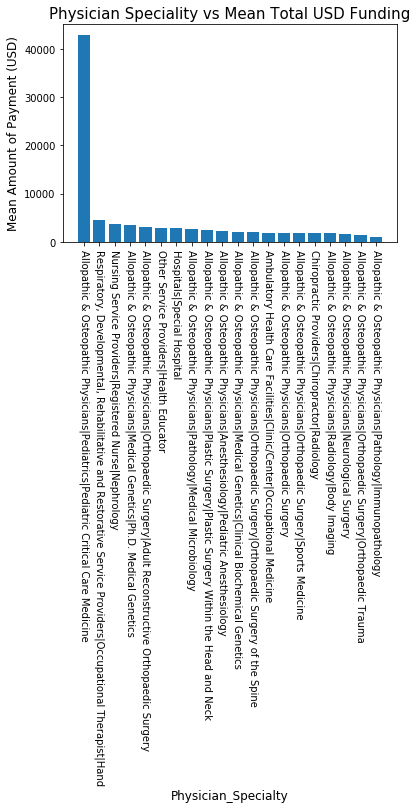

In [52]:
# plotting speciality vs total $$ funding -- df mean/first 20

plt.bar(df["Total_Amount_of_Payment_USDollars"].sort_values(ascending=False).index.get_level_values(0)[:20], df["Total_Amount_of_Payment_USDollars"].sort_values(ascending=False).iloc[:20])
plt.xlabel("Physician_Specialty", fontsize=12)
plt.xticks(rotation=-90)
plt.ylabel("Mean Amount of Payment (USD)", fontsize=12)
plt.title("Physician Speciality vs Mean Total USD Funding", fontsize=15)

Text(0.5, 1.0, 'Physician Speciality vs Total USD Funding')

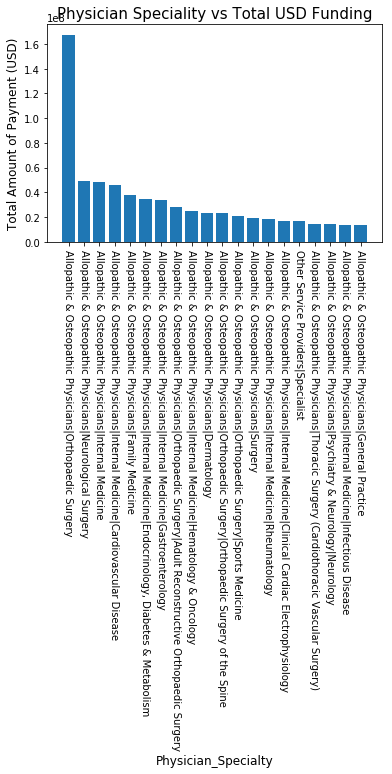

In [54]:
# plotting speciality vs total $$ funding -- df3 total/first 20

plt.bar(df3["Total_Amount_of_Payment_USDollars"].sort_values(ascending=False).index.get_level_values(0)[:20], df3["Total_Amount_of_Payment_USDollars"].sort_values(ascending=False).iloc[:20])
plt.xlabel("Physician_Specialty", fontsize=12)
plt.xticks(rotation=-90)
plt.ylabel("Total Amount of Payment (USD)", fontsize=12)
plt.title("Physician Speciality vs Total USD Funding", fontsize=15)

## Prescriptions Dataset

In [55]:
filename = "/Volumes/Samsung_T5/Misc/PartD_Prescriber_PUF_NPI_Drug_16.txt"

prescriptions = dd.read_csv(filename, sep="\t")

The prescriptions dataset contains information about doctors, what drugs they prescribed, how many of the drugs they prescribed, and whether they gave the branded or the generic version of the drug.

### Data Preprocessing

In [56]:
columns_dropped_prescriptions = ["description_flag", "bene_count_ge65", "bene_count_ge65_suppress_flag", 
                                 "ge65_suppress_flag", "total_claim_count_ge65",
                                "total_30_day_fill_count_ge65", "total_day_supply_ge65", "total_drug_cost_ge65"]

prescriptions = prescriptions.drop(columns_dropped_prescriptions, axis=1)

In [57]:
prescriptions.columns

Index(['npi', 'nppes_provider_last_org_name', 'nppes_provider_first_name',
       'nppes_provider_city', 'nppes_provider_state', 'specialty_description',
       'drug_name', 'generic_name', 'bene_count', 'total_claim_count',
       'total_30_day_fill_count', 'total_day_supply', 'total_drug_cost'],
      dtype='object')

In [58]:
prescriptions.head(1000)

,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_city,nppes_provider_state,specialty_description,drug_name,generic_name,bene_count,total_claim_count,total_30_day_fill_count,total_day_supply,total_drug_cost
0,1003000126,ENKESHAFI,ARDALAN,CUMBERLAND,MD,Internal Medicine,ATORVASTATIN CALCIUM,ATORVASTATIN CALCIUM,NaN,13,15.0,450,139.32
1,1003000126,ENKESHAFI,ARDALAN,CUMBERLAND,MD,Internal Medicine,CIPROFLOXACIN HCL,CIPROFLOXACIN HCL,NaN,11,11.0,96,80.99
2,1003000126,ENKESHAFI,ARDALAN,CUMBERLAND,MD,Internal Medicine,DOXYCYCLINE HYCLATE,DOXYCYCLINE HYCLATE,20.0,20,20.0,199,586.12
3,1003000126,ENKESHAFI,ARDALAN,CUMBERLAND,MD,Internal Medicine,ELIQUIS,APIXABAN,NaN,17,17.0,510,6065.02
4,1003000126,ENKESHAFI,ARDALAN,CUMBERLAND,MD,Internal Medicine,FUROSEMIDE,FUROSEMIDE,12.0,17,17.0,405,45.76
5,1003000126,ENKESHAFI,ARDALAN,CUMBERLAND,MD,Internal Medicine,HYDRALAZINE HCL,HYDRALAZINE HCL,NaN,16,16.0,420,169.48
6,1003000126,ENKESHAFI,ARDALAN,CUMBERLAND,MD,Internal Medicine,ISOSORBIDE MONONITRATE ER,ISOSORBIDE MONONITRATE,16.0,33,35.0,1005,372.63
7,1003000126,ENKESHAFI,ARDALAN,CUMBERLAND,MD,Internal Medicine,LEVOFLOXACIN,LEVOFLOXACIN,26.0,26,26.0,159,222.41
8,1003000126,ENKESHAFI,ARDALAN,CUMBERLAND,MD,Internal Medicine,LISINOPRIL,LISINOPRIL,14.0,31,32.0,960,129.24
9,1003000126,ENKESHAFI,ARDALAN,CUMBERLAND,MD,Internal Medicine,METOPROLOL TARTRATE,METOPROLOL TARTRATE,14.0,33,37.0,1050,183.29


In [59]:
prescriptions['name']  = prescriptions['nppes_provider_last_org_name'].str.title() + " " + prescriptions['nppes_provider_first_name'].str.title()

In [60]:
to_remove = ['nppes_provider_last_org_name', 'nppes_provider_first_name']

pres = prescriptions.drop(to_remove, axis=1)

In [61]:
cols =['name'] + [col for col in pres.columns if col != 'name']

pres2 = pres[cols]

In [62]:
pres2.head(5)

,name,npi,nppes_provider_city,nppes_provider_state,specialty_description,drug_name,generic_name,bene_count,total_claim_count,total_30_day_fill_count,total_day_supply,total_drug_cost
0,Enkeshafi Ardalan,1003000126,CUMBERLAND,MD,Internal Medicine,ATORVASTATIN CALCIUM,ATORVASTATIN CALCIUM,NaN,13,15.0,450,139.32
1,Enkeshafi Ardalan,1003000126,CUMBERLAND,MD,Internal Medicine,CIPROFLOXACIN HCL,CIPROFLOXACIN HCL,NaN,11,11.0,96,80.99
2,Enkeshafi Ardalan,1003000126,CUMBERLAND,MD,Internal Medicine,DOXYCYCLINE HYCLATE,DOXYCYCLINE HYCLATE,20.0,20,20.0,199,586.12
3,Enkeshafi Ardalan,1003000126,CUMBERLAND,MD,Internal Medicine,ELIQUIS,APIXABAN,NaN,17,17.0,510,6065.02
4,Enkeshafi Ardalan,1003000126,CUMBERLAND,MD,Internal Medicine,FUROSEMIDE,FUROSEMIDE,12.0,17,17.0,405,45.76


In [63]:
pres3 = pres2.compute()

### Filter Dataset by Top-most paid Specialties

In [64]:
## top-paid doctors in total
orthopaedic = pres3[pres3['specialty_description'] == 'Orthopaedic Surgery']

In [65]:
## top-paid doctors on average
pediatrics = pres3[pres3['specialty_description'].str.startswith('Pediatrics')]

In [66]:
## 
df = pd.DataFrame(orthopaedic.groupby(["drug_name", "generic_name", "name"])['total_claim_count'].sum())

In [67]:
df['total_claim_count'].sort_values(ascending=False)

drug_name                  generic_name                name                  
HYDROCODONE-ACETAMINOPHEN  HYDROCODONE/ACETAMINOPHEN   Pearson John              820
DICLOFENAC SODIUM          DICLOFENAC SODIUM           Rodriguez Rene            772
HYDROCODONE-ACETAMINOPHEN  HYDROCODONE/ACETAMINOPHEN   Mckeever Grant            714
DICLOFENAC SODIUM          DICLOFENAC SODIUM           Berger Richard            516
NAPROXEN                   NAPROXEN                    Rodriguez Rene            477
HYDROCODONE-ACETAMINOPHEN  HYDROCODONE/ACETAMINOPHEN   Beale James               361
LEVOTHYROXINE SODIUM       LEVOTHYROXINE SODIUM        Pacheco Donald            355
IBUPROFEN                  IBUPROFEN                   Mckeever Grant            347
HYDROCODONE-ACETAMINOPHEN  HYDROCODONE/ACETAMINOPHEN   Berger Richard            314
IBUPROFEN                  IBUPROFEN                   Rodriguez Rene            311
PANTOPRAZOLE SODIUM        PANTOPRAZOLE SODIUM         Berger Richard   

In [68]:
ortho_names = df.index.get_level_values(2) 

In [69]:
import re
g = []
for x in orthopaedic['generic_name']:
    x = re.sub(r'\/', '-', x)
    g.append(x)

In [70]:
orthopaedic['generic_name'] = g

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [71]:
orthopaedic['generic_name'] 

10287                        LIRAGLUTIDE
34001          HYDROCODONE-ACETAMINOPHEN
34002                          MELOXICAM
34003                      OXYCODONE HCL
34004        OXYCODONE HCL-ACETAMINOPHEN
34005                       TRAMADOL HCL
55240          HYDROCODONE-ACETAMINOPHEN
55241                      OXYCODONE HCL
55242        OXYCODONE HCL-ACETAMINOPHEN
57119                          MELOXICAM
61915          HYDROCODONE-ACETAMINOPHEN
61916                      OXYCODONE HCL
65436                  ENOXAPARIN SODIUM
65437        OXYCODONE HCL-ACETAMINOPHEN
113578         HYDROCODONE-ACETAMINOPHEN
113579                         IBUPROFEN
113580                    TIZANIDINE HCL
161235                      TRAMADOL HCL
224453                        FUROSEMIDE
224454                        LISINOPRIL
224455              METOPROLOL SUCCINATE
239803                        ALPRAZOLAM
239804                          DIAZEPAM
239805       OXYCODONE HCL-ACETAMINOPHEN
239806          

In [72]:
generic = []
generic_docs = []

brand = []
brand_docs = []

for x, y, z in zip(orthopaedic['generic_name'], orthopaedic['drug_name'], orthopaedic['name']):
    if (x == y):
        generic_docs.append(z)
        generic.append(x)
    else:
        brand_docs.append(z)
        brand.append(y)


In [73]:
ortho_generic = pd.DataFrame()

ortho_generic['doctors'] = generic_docs
ortho_generic['generic_name'] = generic

In [74]:
ortho_generic.shape

(2300, 2)

In [75]:
ortho_brand = pd.DataFrame()

ortho_brand['doctors'] = brand_docs
ortho_brand['brand_name'] = brand

In [76]:
# clean up dashes
p = []
for x in pediatrics['generic_name']:
    x = re.sub(r'\/', '-', x)
    p.append(x)

pediatrics['generic_name'] = p

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [77]:
generic_p = []
generic_docs_p = []

brand_p = []
brand_docs_p = []

for x, y, z in zip(pediatrics['generic_name'], pediatrics['drug_name'], pediatrics['name']):
    if (x == y):
        generic_docs_p.append(z)
        generic_p.append(x)
    else:
        brand_docs_p.append(z)
        brand_p.append(y)


In [78]:
pedi_generic = pd.DataFrame()

pedi_generic['doctors'] = generic_docs_p
pedi_generic['generic_name'] = generic_p

In [79]:
pedi_brand = pd.DataFrame()

pedi_brand['doctors'] = brand_docs_p
pedi_brand['brand_name'] = brand_p

In [80]:
pedi_brand

,doctors,brand_name
0,Weems Diane,BOOSTRIX TDAP
1,Weems Diane,ZOSTAVAX
2,Goldberg Amy,BUPROPION XL
3,Goldberg Amy,TROSPIUM CHLORIDE ER


In [82]:
brand_names_data = pd.read_csv('spending_manufacturer_summary_2016.csv')
brand_names_data

,Brand Name,Generic Name,Manufacturer,Total Spending,Total Dosage Units,Total Claims,Total Beneficiaries,Average Spending Per Dosage Unit (Weighted),Average Spending Per Claim,Average Spending Per Beneficiary
0,1st Tier Unifine Pentips,"Pen Needle, Diabetic",Owen Mumford Us,"$215,930.43","1,050,323","8,897","3,423",$0.21,$24.27,$63.08
1,1st Tier Unifine Pentips Plus,"Pen Needle, Diabetic",Owen Mumford Us,"$378,001.19","1,750,607","14,611","6,456",$0.22,$25.87,$58.55
2,Abacavir,Abacavir Sulfate,Apotex Corp,"$2,491,345.83","533,661","8,449","2,320",$4.67,$294.87,"$1,073.86"
3,Abacavir,Abacavir Sulfate,Aurobindo Pharm,"$7,154,093.03","1,558,949","25,385","4,602",$4.59,$281.82,"$1,554.56"
4,Abacavir,Abacavir Sulfate,Camber Pharmace,"$6,766,490.99","1,547,860","23,189","4,580",$4.37,$291.80,"$1,477.40"
5,Abacavir,Abacavir Sulfate,Mylan,"$2,925,844.14","613,193","9,503","2,855",$4.77,$307.89,"$1,024.81"
6,Abacavir-Lamivudine,Abacavir Sulfate/Lamivudine,Prasco Labs,"$6,765,112.20","199,418","6,430",,$33.92,"$1,052.12",
7,Abacavir-Lamivudine,Abacavir Sulfate/Lamivudine,Teva USA,"$7,990,669.89","240,422","7,476",,$33.24,"$1,068.84",
8,Abacavir-Lamivudine-Zidovudine,Abacavir/Lamivudine/Zidovudine,Lupin Pharmaceu,"$12,787,721.57","608,455","9,768","1,333",$21.02,"$1,309.14","$9,593.19"
9,Abelcet,Amphotericin B Lipid Complex,Sigma-Tau/Leadi,"$752,938.84","85,650",476,,$8.79,"$1,581.80",


In [87]:
big_players_pedi = brand_names_data[brand_names_data['Brand Name'].isin(pedi_brand['brand_name'].str.title())]

In [88]:
big_players_pedi

,Brand Name,Generic Name,Manufacturer,Total Spending,Total Dosage Units,Total Claims,Total Beneficiaries,Average Spending Per Dosage Unit (Weighted),Average Spending Per Claim,Average Spending Per Beneficiary
786,Boostrix Tdap,"Diphth,Pertuss(Acell),Tet Vac",Glaxosmithkline,"$17,837,375.83","164,482","295,793","292,091",$108.45,$60.30,$61.07
7191,Zostavax,Zoster Vaccine Live/PF,Merck Sharp & D,"$180,548,938.77","834,299","835,358","833,957",$216.41,$216.13,$216.50


In [89]:
big_players_ortho = brand_names_data[brand_names_data['Brand Name'].isin(ortho_brand['brand_name'].str.title())]

In [90]:
big_players_ortho

,Brand Name,Generic Name,Manufacturer,Total Spending,Total Dosage Units,Total Claims,Total Beneficiaries,Average Spending Per Dosage Unit (Weighted),Average Spending Per Claim,Average Spending Per Beneficiary
34,Acetaminophen-Codeine,Acetaminophen With Codeine,AHP,"$20,274.53","56,439","1,158",615,$0.34,$17.51,$32.97
35,Acetaminophen-Codeine,Acetaminophen With Codeine,Amneal Pharmace,"$10,532,865.92","49,951,497","1,007,971","561,862",$0.21,$10.45,$18.75
36,Acetaminophen-Codeine,Acetaminophen With Codeine,Aurobindo Pharm,"$2,545,660.48","8,700,726","110,630","53,480",$0.28,$23.01,$47.60
37,Acetaminophen-Codeine,Acetaminophen With Codeine,Hi-Tech/Akorn C,"$207,150.70","8,395,060","26,717","17,874",$0.02,$7.75,$11.59
38,Acetaminophen-Codeine,Acetaminophen With Codeine,Mallinckrodt Ph,"$9,986,542.81","34,634,977","635,320","327,612",$0.28,$15.72,$30.48
39,Acetaminophen-Codeine,Acetaminophen With Codeine,Mckesson Packag,"$10,032.60","35,330","1,006",576,$0.28,$9.97,$17.42
40,Acetaminophen-Codeine,Acetaminophen With Codeine,Morton Grove Ph,"$54,936.11","2,298,697","7,197","5,134",$0.02,$7.63,$10.70
41,Acetaminophen-Codeine,Acetaminophen With Codeine,Mylan Instituti,"$3,774.26","10,831",548,264,$0.35,$6.89,$14.30
42,Acetaminophen-Codeine,Acetaminophen With Codeine,Pharmaceutical,"$68,708.92","2,389,443","8,077","5,412",$0.03,$8.51,$12.70
43,Acetaminophen-Codeine,Acetaminophen With Codeine,Qualitest/Par P,"$5,089,417.68","18,137,938","291,448",,$0.26,$17.46,


In [94]:
n20 = [i.title() for i in top_companies]
n20

['Genentech, Inc.',
 'Zimmer Biomet Holdings, Inc.',
 'Depuy Synthes Products, Llc.',
 'Stryker Corporation',
 'Astrazeneca Pharmaceuticals Lp',
 'Pfizer Inc.',
 'Allergan Inc.',
 'Arthrex, Inc.',
 'Janssen Pharmaceuticals, Inc',
 'Medtronic Sofamor Danek Usa, Inc.',
 'Medtronic Vascular, Inc.',
 'Smith & Nephew, Inc.',
 'Medtronic Usa, Inc.',
 'Abbvie, Inc.',
 'Gilead Sciences Inc',
 'Topera, Inc.',
 'Glaxosmithkline, Llc.',
 'Celgene Corporation',
 'Boston Scientific Corporation',
 'Merck Sharp & Dohme Corporation',
 'Intuitive Surgical, Inc.',
 'Novartis Pharmaceuticals Corporation']

In [100]:
big_players_ortho[big_players_ortho['Manufacturer'].str.lower().isin(top_companies)]

,Brand Name,Generic Name,Manufacturer,Total Spending,Total Dosage Units,Total Claims,Total Beneficiaries,Average Spending Per Dosage Unit (Weighted),Average Spending Per Claim,Average Spending Per Beneficiary
1506,Combigan,Brimonidine Tartrate/Timolol,Allergan Inc.,"$244,572,768.55","9,106,715","1,244,550","261,885",$26.86,$196.52,$933.89
3785,Linzess,Linaclotide,Allergan Inc.,"$411,043,476.83","38,454,488","1,098,745","268,655",$10.69,$374.10,"$1,530.00"
3949,Lumigan,Bimatoprost,Allergan Inc.,"$483,981,308.72","8,147,068","2,058,782","433,783",$59.41,$235.08,"$1,115.72"
5833,Restasis,Cyclosporine,Allergan Inc.,"$949,331,114.91","134,860,680","1,642,166","574,222",$7.04,$578.10,"$1,653.25"


In [101]:
brand_names_data[brand_names_data['Manufacturer'].str.lower().str.startswith('abbvie')]

,Brand Name,Generic Name,Manufacturer,Total Spending,Total Dosage Units,Total Claims,Total Beneficiaries,Average Spending Per Dosage Unit (Weighted),Average Spending Per Claim,Average Spending Per Beneficiary
444,Androgel,Testosterone,Abbvie US LLC,"$242,810,652.94","38,218,176","309,024","76,603",$6.59,$785.73,"$3,169.73"
752,Biaxin,Clarithromycin,Abbvie US LLC,"$123,747.82","12,861",354,125,$9.62,$349.57,$989.98
1549,Creon,Lipase/Protease/Amylase,Abbvie US LLC,"$462,114,263.01","99,418,915","607,493","125,425",$4.64,$760.69,"$3,684.39"
1673,Depakene,Valproic Acid,Abbvie US LLC,"$621,035.50","274,223","1,134",521,$2.26,$547.65,"$1,192.01"
1674,Depakene,Valproic Acid (As Sodium Salt),Abbvie US LLC,"$1,751,702.21","1,857,867","1,908",223,$0.94,$918.08,"$7,855.17"
1675,Depakote,Divalproex Sodium,Abbvie US LLC,"$18,751,256.25","4,381,009","34,884","4,315",$4.37,$537.53,"$4,345.60"
1676,Depakote ER,Divalproex Sodium,Abbvie US LLC,"$21,343,616.15","4,809,225","46,867","5,670",$4.42,$455.41,"$3,764.31"
1677,Depakote Sprinkle,Divalproex Sodium,Abbvie US LLC,"$3,731,274.65","2,490,622","8,541","1,334",$1.50,$436.87,"$2,797.06"
2819,Gengraf,"Cyclosporine, Modified",Abbvie US LLC,"$1,613,292.72","1,438,253","7,754",861,$1.37,$208.06,"$1,873.74"
3010,Humira,Adalimumab,Abbvie US LLC,"$490,135,622.39","249,431","100,135","15,477","$1,965.01","$4,894.75","$31,668.65"
